# Candlestick Identical Three Crows

https://www.investopedia.com/terms/t/three_black_crows.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SNAP'
start = '2016-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100


## Candlestick with Identical Three Crows

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736390.0,24.000000,26.049999,23.500000,24.480000,24.480000,217048900,True
1,736391.0,26.389999,29.440001,26.059999,27.090000,27.090000,148166400,True
2,736394.0,28.170000,28.250000,23.770000,23.770000,23.770000,72903000,False
3,736395.0,22.209999,22.500000,20.639999,21.440001,21.440001,71857800,False
4,736396.0,22.030001,23.430000,21.309999,22.809999,22.809999,49819100,True


Text(0, 0.5, 'Price')

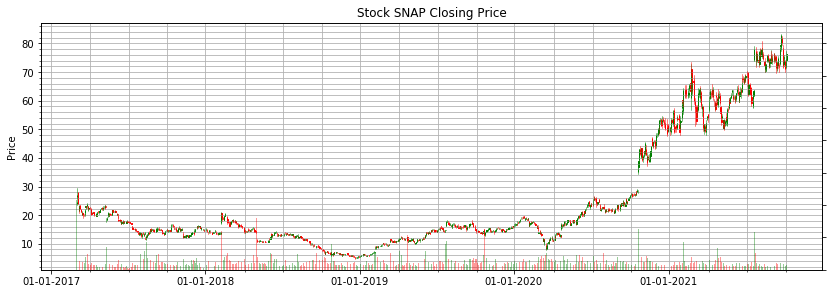

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
identical_three_crows = talib.CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Close'])

identical_three_crows = identical_three_crows[identical_three_crows != 0]

In [6]:
df['identical_three_crows'] = talib.CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['identical_three_crows'] !=0]

,Open,High,Low,Close,Adj Close,Volume,identical_three_crows
Date,,,,,,,
2018-02-27,17.059999,17.450001,16.309999,16.32,16.32,30022400,-100


In [8]:
df['Adj Close'].loc[df['identical_three_crows'] !=0]

Date
2018-02-27    16.32
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['identical_three_crows'] !=0].index

DatetimeIndex(['2018-02-27'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
identical_three_crows

Date
2018-02-27   -100
dtype: int32

In [11]:
identical_three_crows.index

DatetimeIndex(['2018-02-27'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,identical_three_crows
Date,,,,,,,
2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900,0
2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400,0
2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000,0
2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800,0
2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100,0
...,...,...,...,...,...,...,...
2021-10-01,74.820000,75.889999,73.440002,75.250000,75.250000,11689700,0
2021-10-04,74.029999,74.199997,69.970001,71.230003,71.230003,18142600,0
2021-10-05,72.180000,73.910004,71.790001,73.410004,73.410004,11896500,0


Text(0, 0.5, 'Price')

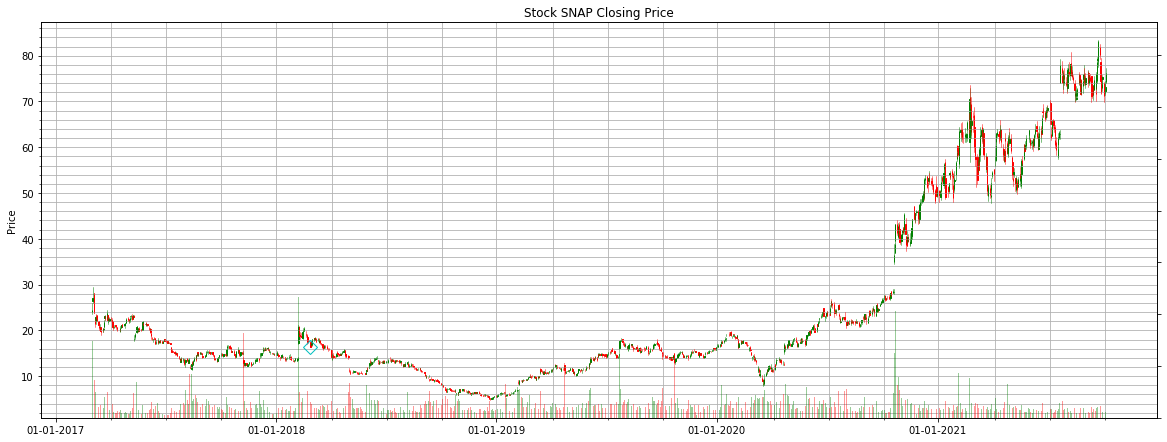

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['identical_three_crows'] !=0].index, df['Adj Close'].loc[df['identical_three_crows'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2018-02-01':'2018-03-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,identical_three_crows,VolumePositive
0,736726.0,13.43,14.000000,13.400000,13.92,13.92,13306000,0,True
1,736727.0,13.59,13.890000,13.510000,13.71,13.71,18123300,0,True
2,736730.0,13.35,14.030000,13.320000,13.85,13.85,20637700,0,True
3,736731.0,13.50,14.200000,13.470000,14.06,14.06,45110200,0,True
4,736732.0,17.15,21.219999,16.959999,20.75,20.75,232325100,0,True


Text(0, 0.5, 'Price')

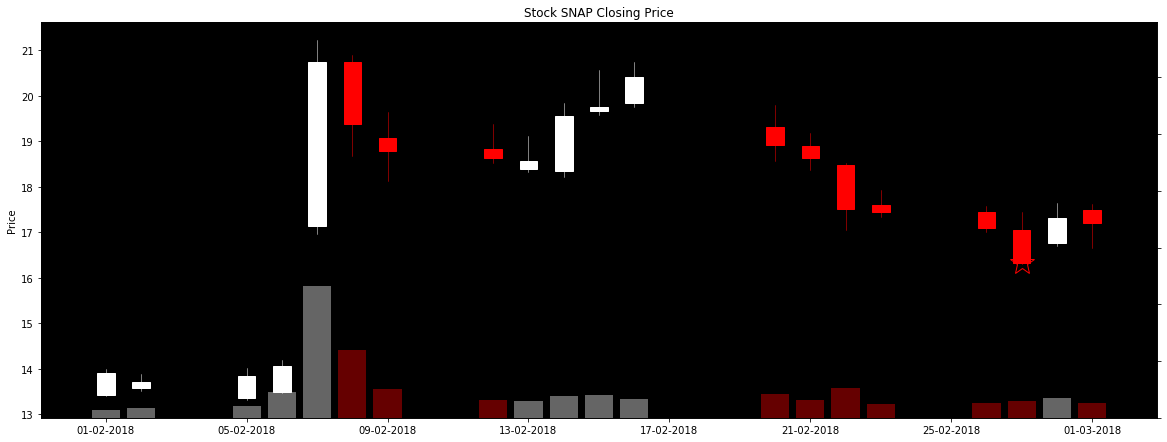

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='white', colordown='red', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['identical_three_crows'] !=0].index, df['Adj Close'].loc[df['identical_three_crows'] !=0],
                '*r', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'white', False: 'red'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

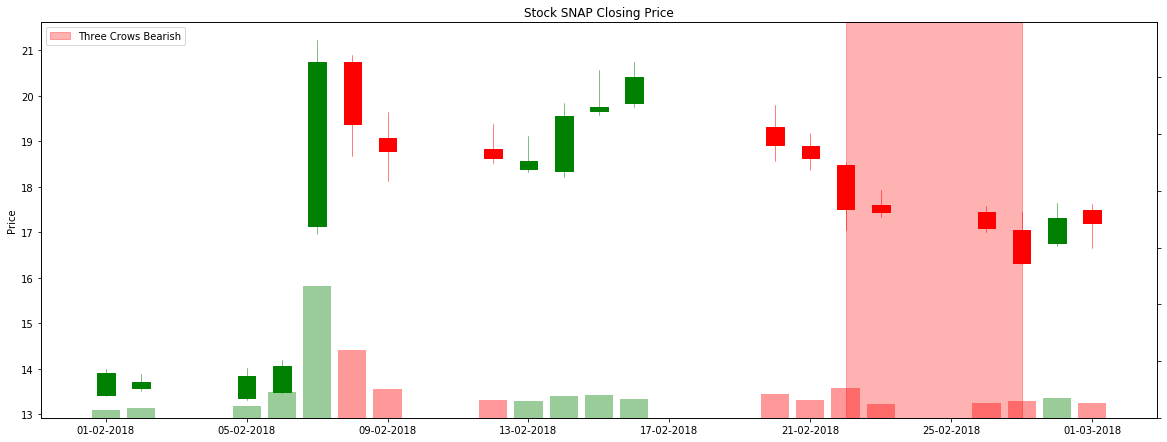

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2018,2,22)), date2num(datetime(2018,2,27)), 
           label="Three Crows Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')